In [4]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
G=ox.graph_from_place('Barcelona, Spain', network_type='bike', retain_all=True)
#ox.plot_graph(G, fig_height=15, fig_width=10)

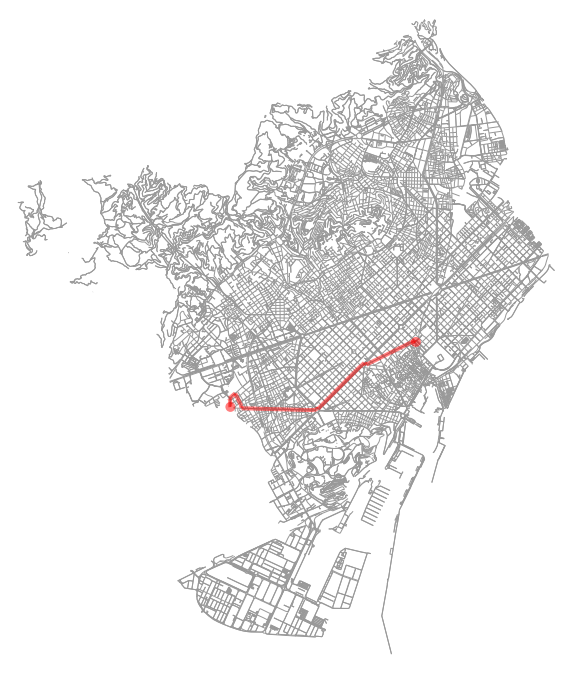

In [3]:
#Get nearesr network node to each point
origin_node= ox.get_nearest_node(G, (41.391052, 2.180645)) #Arc de triomf
destination_node=ox.get_nearest_node(G, (41.3751984992, 2.12036451854)) #Camp nou

#Find the route between these nodes then plot it
route=nx.shortest_path(G, origin_node, destination_node, weight='length', method='dijkstra')
fig, ax= ox.plot_graph_route(G, route, node_size=0, fig_height=15, fig_width=10)

In [4]:
city_nodes, city_edges = ox.graph_to_gdfs(G)
print(city_nodes.shape)
print(city_edges.shape)

(18105, 6)
(37501, 20)


In [5]:
city_nodes.head()

,y,x,osmid,highway,ref,geometry
21638832,41.363537,2.183085,21638832,turning_circle,NaN,POINT (2.18309 41.36354)
21638843,41.370365,2.187593,21638843,NaN,NaN,POINT (2.18759 41.37036)
21638845,41.370095,2.187758,21638845,NaN,NaN,POINT (2.18776 41.37009)
21638855,41.374983,2.188831,21638855,NaN,NaN,POINT (2.18883 41.37498)
21638859,41.376347,2.188693,21638859,NaN,NaN,POINT (2.18869 41.37635)


In [6]:
city_edges.head()

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,access,service,lanes,ref,width,tunnel,est_width,bridge,junction,area
0,21638832,1259351831,0,23430836,Passeig de l'Escullera,service,False,218.209,"LINESTRING (2.18309 41.36354, 2.18300 41.36347...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21638843,4931844334,0,502812532,NaN,service,False,9.721,"LINESTRING (2.18759 41.37036, 2.18748 41.37038)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21638843,21638845,0,4079500,Passeig de Joan de Borbó,residential,False,33.171,"LINESTRING (2.18759 41.37036, 2.18763 41.37028...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21638843,1404092135,0,"[543357596, 423227070]",Passeig de Joan de Borbó,residential,False,244.776,"LINESTRING (2.18759 41.37036, 2.18761 41.37054...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21638845,885308258,0,554707785,Passeig de Joan de Borbó,residential,False,28.718,"LINESTRING (2.18776 41.37009, 2.18771 41.36984)",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Barcelona Trees EDA

In [5]:
trees=pd.read_csv('trees.csv')
trees.head()

,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,...,CATEGORIA_ARBRAT,AMPLADA_VORERA,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA


In [6]:
trees.columns

Index(['CODI', 'X_ETRS89', 'Y_ETRS89', 'LATITUD_WGS84', 'LONGITUD_WGS84',
       'TIPUS_ELEMENT', 'ESPAI_VERD', 'ADRECA', 'ALCADA', 'CAT_ESPECIE_ID',
       'NOM_CIENTIFIC', 'NOM_CASTELLA', 'NOM_CATALA', 'CATEGORIA_ARBRAT',
       'AMPLADA_VORERA', 'DATA_PLANTACIO', 'TIPUS_AIGUA', 'TIPUS_REG',
       'TIPUS_SUPERFICIE', 'TIPUS_SUPORT', 'COBERTURA_ESCOCELL',
       'MIDA_ESCOCELL', 'VORA_ESCOCELL'],
      dtype='object')

In [7]:
columns=['CODI', 'X_ETRS89', 'Y_ETRS89', 'LATITUD_WGS84', 'LONGITUD_WGS84',
       'TIPUS_ELEMENT', 'ESPAI_VERD', 'ADRECA', 'ALCADA', 'CAT_ESPECIE_ID',
       'NOM_CIENTIFIC', 'NOM_CASTELLA', 'NOM_CATALA', 'CATEGORIA_ARBRAT',
       'AMPLADA_VORERA', 'DATA_PLANTACIO', 'TIPUS_AIGUA', 'TIPUS_REG',
       'TIPUS_SUPERFICIE', 'TIPUS_SUPORT', 'COBERTURA_ESCOCELL',
       'MIDA_ESCOCELL', 'VORA_ESCOCELL']

In [8]:
translated_columns=['Code', 'X_Coordinates', 'Y_Coordinates', 'LAT', 'LONG', 'Type', 'Green_Space', 'Address',
                    'Height', 'Species_ID', 'Scientific_Name', 'Castellan_Name', 'Catalan_Name', 'Tree_Categoy', 
                    'Wide_Sidewalk', 'Data_Plantation', 'Water_Type', 'Irrigation_Type', 'Superficie_Type',
                    'Support_Type', 'Coverage_of_gangway', 'Size_of_gangway', 'Edge_of_Gangway']

In [9]:
dict_=dict(zip(columns, translated_columns))

In [10]:
trees=trees.rename(columns=dict_)
trees.head()

,Code,X_Coordinates,Y_Coordinates,LAT,LONG,Type,Green_Space,Address,Height,Species_ID,...,Tree_Categoy,Wide_Sidewalk,Data_Plantation,Water_Type,Irrigation_Type,Superficie_Type,Support_Type,Coverage_of_gangway,Size_of_gangway,Edge_of_Gangway
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,...,NaN,NaN,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,...,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,...,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA


In [111]:
trees.shape

(157319, 23)

In [112]:
trees.isnull().sum()

Code                        0
X_Coordinates               0
Y_Coordinates               0
LAT                         0
LONG                        0
Type                        0
Green_Space            130362
Address                     0
Height                   6381
Species_ID                  0
Scientific_Name             0
Castellan_Name           3500
Catalan_Name             3688
Tree_Categoy             3621
Wide_Sidewalk           26880
Data_Plantation        133898
Water_Type             153604
Irrigation_Type            13
Superficie_Type          4857
Support_Type             4797
Coverage_of_gangway     18155
Size_of_gangway         20165
Edge_of_Gangway          9419
dtype: int64

In [113]:
trees.Size_of_gangway.value_counts()

major que o igual a  100 cm    73800
ENTRE 60 I 100 cm              59948
menor que o igual a 60 cm       3206
ALTRES                           200
Name: Size_of_gangway, dtype: int64

In [114]:
trees.Height.value_counts()

MITJANA     63987
PETITA      41711
GRAN        39855
EXEMPLAR     5385
Name: Height, dtype: int64

In [116]:
trees_by_height=trees.groupby(['Size_of_gangway', 'Height']).Code.count().unstack()
trees_by_height

Height,EXEMPLAR,GRAN,MITJANA,PETITA
Size_of_gangway,,,,
ALTRES,7,32,26,126
ENTRE 60 I 100 cm,1874,14376,24703,17032
major que o igual a 100 cm,2765,21332,30273,17017
menor que o igual a 60 cm,39,352,1173,1498


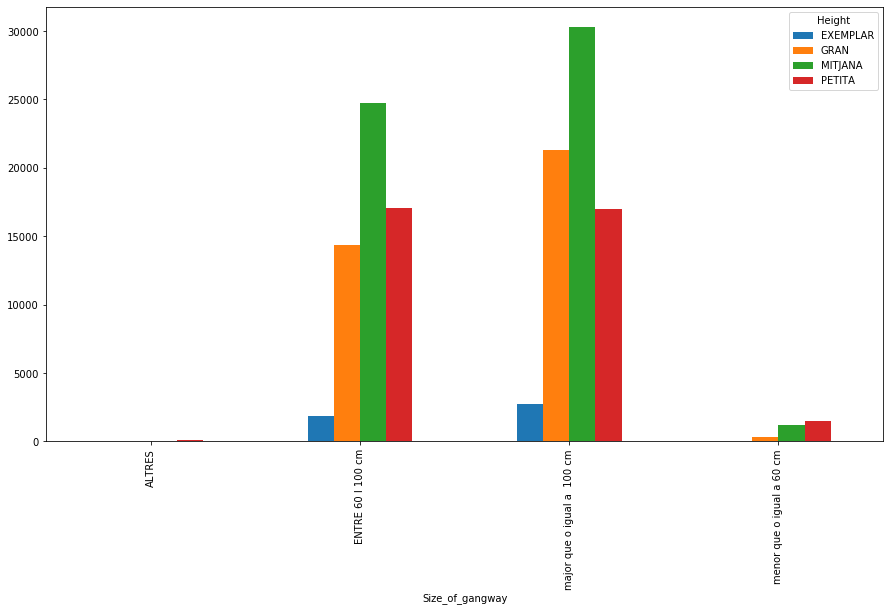

In [172]:
ax = trees_by_height[:10].plot.bar(figsize=(15,8))

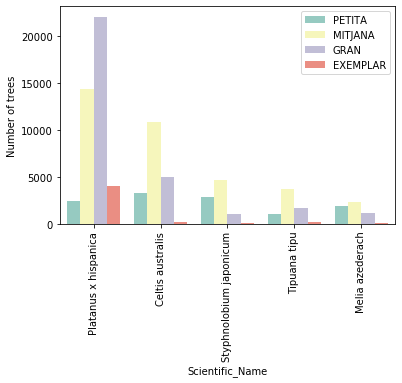

In [152]:
import seaborn as sns
tree_name=trees['Scientific_Name'].value_counts().index[:5]
fig=sns.countplot(x="Scientific_Name", hue="Height", data=trees, order=tree_name, palette="Set3")
plt.setp(fig.xaxis.get_majorticklabels(), rotation=90)
fig.set_ylabel("Number of trees")
fig.legend(loc=1)
fig.update;

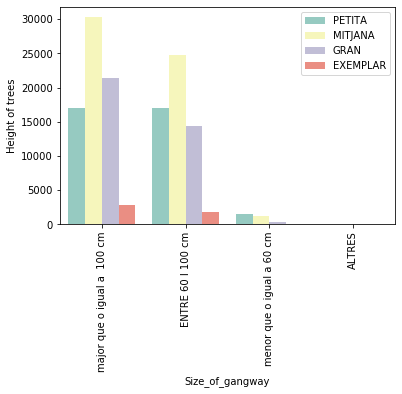

In [159]:
tree_height=trees['Size_of_gangway'].value_counts().index[:5]
fig=sns.countplot(x="Size_of_gangway", hue="Height", palette="Set3", data=trees, order=tree_height)
plt.setp(fig.xaxis.get_majorticklabels(), rotation=90)
fig.set_ylabel("Height of trees")
fig.legend(loc=1)
fig.update;

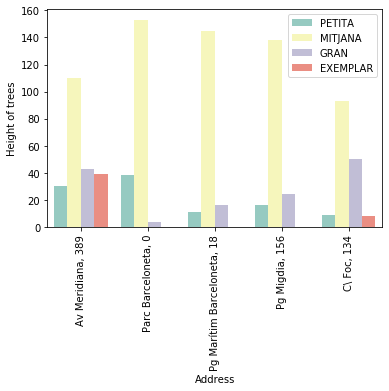

In [164]:
tree_height=trees['Address'].value_counts().index[:5]
fig=sns.countplot(x="Address", hue="Height", palette="Set3", data=trees, order=tree_height)
plt.setp(fig.xaxis.get_majorticklabels(), rotation=90)
fig.set_ylabel("Height of trees")
fig.legend(loc=1)
fig.update;

In [121]:
trees.columns

Index(['Code', 'X_Coordinates', 'Y_Coordinates', 'LAT', 'LONG', 'Type',
       'Green_Space', 'Address', 'Height', 'Species_ID', 'Scientific_Name',
       'Castellan_Name', 'Catalan_Name', 'Tree_Categoy', 'Wide_Sidewalk',
       'Data_Plantation', 'Water_Type', 'Irrigation_Type', 'Superficie_Type',
       'Support_Type', 'Coverage_of_gangway', 'Size_of_gangway',
       'Edge_of_Gangway'],
      dtype='object')

# <b>Top 10 Trees

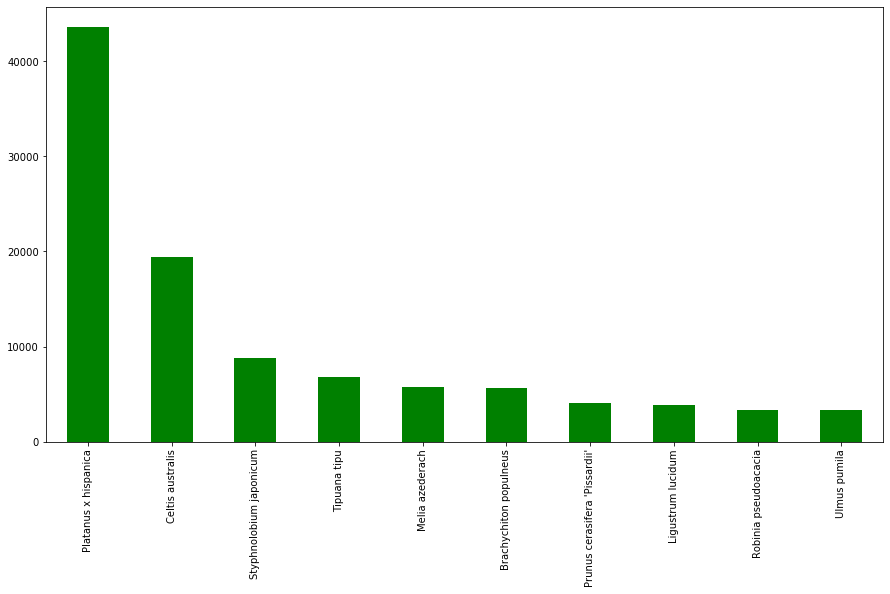

In [144]:
ax = trees["Scientific_Name"].value_counts()[:10].plot.bar(figsize=(15,8), color='g')

# Trees by Height

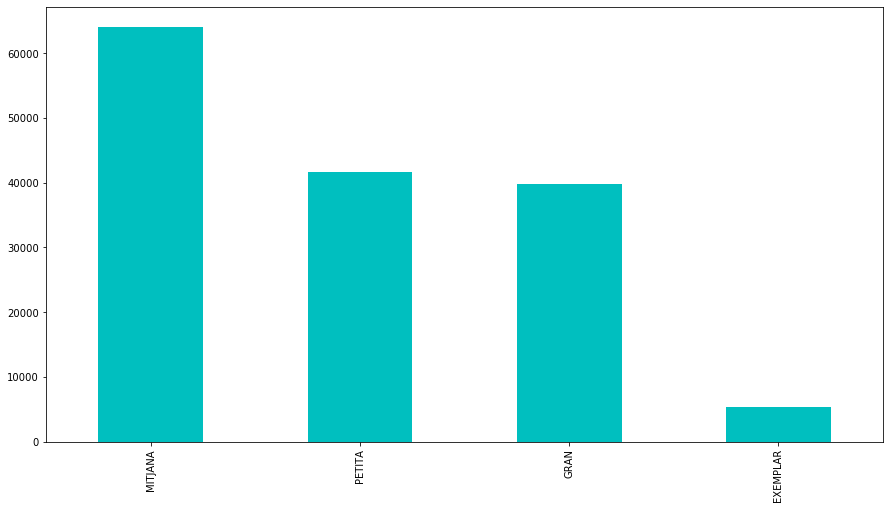

In [145]:
ax = trees["Height"].value_counts()[:10].plot.bar(figsize=(15,8), color='c')

# Trees by Size

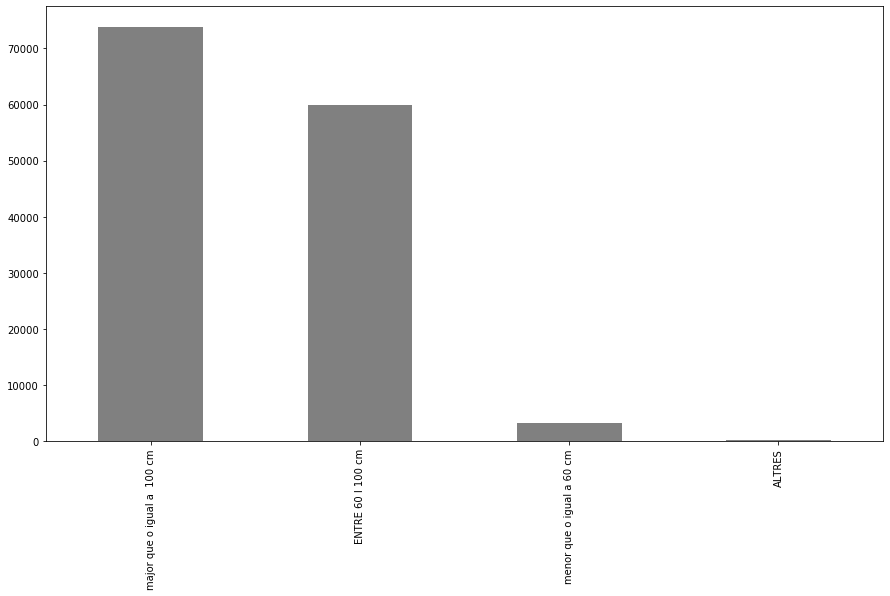

In [148]:
ax = trees["Size_of_gangway"].value_counts()[:10].plot.bar(figsize=(15,8), color='gray')

In [100]:
tree_name

Index(['Platanus x hispanica', 'Celtis australis', 'Styphnolobium japonicum',
       'Tipuana tipu', 'Melia azederach', 'Brachychiton populneus',
       'Prunus cerasifera 'Pissardii'', 'Ligustrum lucidum',
       'Robinia pseudoacacia', 'Ulmus pumila'],
      dtype='object')

In [98]:
list_=dict(trees.Scientific_Name.value_counts())
list_

{'Platanus x hispanica': 43584,
 'Celtis australis': 19470,
 'Styphnolobium japonicum': 8814,
 'Tipuana tipu': 6819,
 'Melia azederach': 5716,
 'Brachychiton populneus': 5625,
 "Prunus cerasifera 'Pissardii'": 4075,
 'Ligustrum lucidum': 3818,
 'Robinia pseudoacacia': 3319,
 'Ulmus pumila': 3292,
 'Cercis siliquastrum': 2983,
 'Jacaranda mimosifolia': 2916,
 "Pyrus calleryana 'Chanticleer'": 2518,
 'Citrus aurantium': 2509,
 "Populus nigra 'Italica'": 2112,
 'Washingtonia robusta': 1926,
 'Magnolia grandiflora': 1813,
 'Phoenix dactylifera': 1544,
 'Tilia x euchlora': 1425,
 'Pinus pinea': 1387,
 'Celtis sinensis': 1190,
 'Gleditsia triacanthos': 1152,
 'Quercus ilex': 1138,
 'Koelreuteria paniculata': 1092,
 'Firmiana simplex': 1067,
 'Grevillea robusta': 1047,
 'Washingtonia filifera': 1038,
 'Hibiscus syriacus': 1026,
 "Gleditsia triacanthos f. 'Inermis'": 990,
 'Fraxinus angustifolia': 951,
 'Tilia x europaea': 895,
 "Koelreuteria paniculata 'Fastigiata'": 802,
 'Catalpa bignonioid

# Plotting Trees on the Map

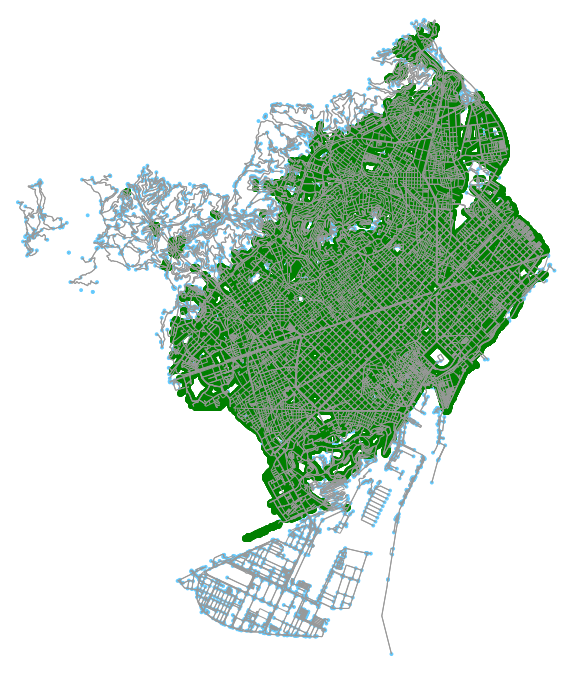

In [14]:
fig, ax = ox.plot_graph(G, show=False, close=False,fig_height=15,fig_width=10)
ax.scatter(barcelona_trees.LONGITUD_WGS84,barcelona_trees.LATITUD_WGS84,c='green')

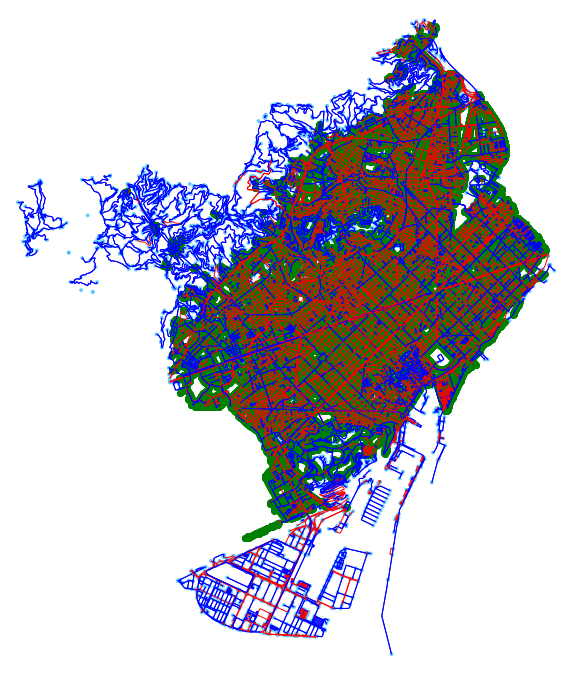

In [15]:
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, show=False,  close=False, fig_height=15, fig_width=10, edge_color=ec,)
ax.scatter(barcelona_trees.LONGITUD_WGS84,barcelona_trees.LATITUD_WGS84,c='green')

In [11]:
barcelona_trees=trees[['Code', 'LAT', 'LONG', 'Address']]
barcelona_trees.head()

,Code,LAT,LONG,Address
0,0000022AR,41.438442,2.165919,"Pg Fabra i Puig, 468"
1,0000025AR,41.437287,2.165353,"Pg Fabra i Puig, 450"
2,0000028AR,41.437335,2.165436,"Pg Fabra i Puig, 450"
3,0000386AR,41.437769,2.162530,"C\ Doctor Letamendi, 90"
4,0000387AR,41.437788,2.162501,"C\ Doctor Letamendi, 90"


In [12]:
tree_nodes=barcelona_trees[["LAT", "LONG"]].apply(lambda x: Point(x["LONG"], x["LAT"]), axis=1)
tree_nodes=gpd.GeoDataFrame({'geometry':tree_nodes})
tree_nodes

,geometry
0,POINT (2.16592 41.43844)
1,POINT (2.16535 41.43729)
2,POINT (2.16544 41.43734)
3,POINT (2.16253 41.43777)
4,POINT (2.16250 41.43779)
...,...
157314,POINT (2.15219 41.39459)
157315,POINT (2.15238 41.39464)
157316,POINT (2.18458 41.38953)
157317,POINT (2.15318 41.40567)


In [58]:
city_nodes, city_edges = ox.graph_to_gdfs(G)
print(city_nodes.shape)
print(city_edges.shape)

(17208, 6)
(36135, 20)


In [42]:
city_nodes.head()

,y,x,osmid,highway,ref,geometry
412549129,41.408580,2.147194,412549129,NaN,NaN,POINT (2.14719 41.40858)
412549130,41.407665,2.148066,412549130,NaN,NaN,POINT (2.14807 41.40766)
412549132,41.407868,2.146323,412549132,NaN,NaN,POINT (2.14632 41.40787)
412549133,41.405680,2.143774,412549133,NaN,NaN,POINT (2.14377 41.40568)
412549137,41.405680,2.145332,412549137,NaN,NaN,POINT (2.14533 41.40568)


In [43]:
city_edges.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,service,junction,access,width,bridge,ref,est_width,tunnel,area
0,412549129,30960821,0,74621162,True,2,Avinguda de la República Argentina,tertiary,30,43.873,"LINESTRING (2.14719 41.40858, 2.14739 41.40834...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,412549130,7095943437,0,36726124,True,2,Carrer de Velázquez,residential,30,72.002,"LINESTRING (2.14807 41.40766, 2.14817 41.40772...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412549130,415950289,0,"[486756070, 284386838, 486756071]",True,2,Avinguda de la República Argentina,tertiary,30,168.370,"LINESTRING (2.14807 41.40766, 2.14866 41.40719...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,412549132,30960820,0,34099200,True,NaN,Carrer de Ferran Puig,residential,30,44.225,"LINESTRING (2.14632 41.40787, 2.14668 41.40757)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,412549132,1487379449,0,35172817,True,NaN,Carrer d'Escipió,residential,30,65.618,"LINESTRING (2.14632 41.40787, 2.14684 41.40831)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
trees.columns

Index(['Code', 'X_Coordinates', 'Y_Coordinates', 'LAT', 'LONG', 'Type',
       'Green_Space', 'Address', 'Height', 'Species_ID', 'Scientific_Name',
       'Castellan_Name', 'Catalan_Name', 'Tree_Categoy', 'Wide_Sidewalk',
       'Data_Plantation', 'Water_Type', 'Irrigation_Type', 'Superficie_Type',
       'Support_Type', 'Coverage_of_gangway', 'Size_of_gangway',
       'Edge_of_Gangway'],
      dtype='object')

In [174]:
city_edges.geometry.unique

<bound method Series.unique of 0        LINESTRING (2.18309 41.36354, 2.18300 41.36347...
1          LINESTRING (2.18759 41.37036, 2.18748 41.37038)
2        LINESTRING (2.18759 41.37036, 2.18763 41.37028...
3        LINESTRING (2.18759 41.37036, 2.18761 41.37054...
4          LINESTRING (2.18776 41.37009, 2.18771 41.36984)
                               ...                        
37496    LINESTRING (2.16624 41.44636, 2.16628 41.44628...
37497      LINESTRING (2.20964 41.42446, 2.20959 41.42438)
37498      LINESTRING (2.18617 41.39776, 2.18580 41.39749)
37499      LINESTRING (2.18580 41.39749, 2.18596 41.39737)
37500      LINESTRING (2.18580 41.39749, 2.18617 41.39776)
Name: geometry, Length: 37501, dtype: geometry>

In [175]:
trees.LAT.unique

<bound method Series.unique of 0         41.438442
1         41.437287
2         41.437335
3         41.437769
4         41.437788
            ...    
157314    41.394591
157315    41.394640
157316    41.389526
157317    41.405674
157318    41.407493
Name: LAT, Length: 157319, dtype: float64>